# How the World Got Online: Internet Usage Evolution (2000-2023)

**_The Rise of Internet Adoption: Trends Across Countries_**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
data = pd.read_csv('internet_usage.csv')
data.head(10)

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,..,0.00472257,0.0045614,0.0878913,0.105809,1.22415,2.10712,1.9,...,7,8.26,11,13.5,16.8,17.6,18.4,..,..,..
1,Albania,ALB,0.114097,0.325798,0.390081,0.9719,2.42039,6.04389,9.60999,15.0361,...,54.3,56.9,59.6,62.4,65.4,68.5504,72.2377,79.3237,82.6137,83.1356
2,Algeria,DZA,0.491706,0.646114,1.59164,2.19536,4.63448,5.84394,7.37598,9.45119,...,29.5,38.2,42.9455,47.6911,49.0385,58.9776,60.6534,66.2356,71.2432,..
3,American Samoa,ASM,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,Andorra,AND,10.5388,..,11.2605,13.5464,26.838,37.6058,48.9368,70.87,...,86.1,87.9,89.7,91.5675,..,90.7187,93.2056,93.8975,94.4855,..
5,Angola,AGO,0.105046,0.136014,0.270377,0.370682,0.464815,1.14337,1.5,1.7,...,21.3623,22,23.2,26,29,32.1294,36.6347,37.8067,39.2935,..
6,Antigua and Barbuda,ATG,6.48223,8.89929,12.5,17.2286,24.2665,27,30,34,...,67.78,70,73,76.2,79.6,83.2,86.8837,87.074,91.4123,..
7,Argentina,ARG,7.03868,9.78081,10.8821,11.9137,16.0367,17.7206,20.9272,25.9466,...,64.7,68.0431,70.969,74.2949,77.7,79.947,85.5144,87.1507,88.3754,89.229
8,Armenia,ARM,1.30047,1.63109,1.96041,4.57522,4.89901,5.25298,5.63179,6.02125,...,54.6228,59.1008,64.346,64.7449,68.2451,66.5439,76.5077,78.6123,77.0277,..
9,Aruba,ABW,15.4428,17.1,18.8,20.8,23,25.4,28,30.9,...,83.78,88.6612,93.5425,97.17,..,..,..,..,..,..


## 📂 Initial Exploration
- Have a gist of the dataset `df.head()`
- check for missing values `df.isnull().sum()`
- Get column names and data types `df.info()`

In [2]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Name  217 non-null    object
 1   Country Code  217 non-null    object
 2   2000          217 non-null    object
 3   2001          217 non-null    object
 4   2002          217 non-null    object
 5   2003          217 non-null    object
 6   2004          217 non-null    object
 7   2005          217 non-null    object
 8   2006          217 non-null    object
 9   2007          217 non-null    object
 10  2008          217 non-null    object
 11  2009          217 non-null    object
 12  2010          217 non-null    object
 13  2011          217 non-null    object
 14  2012          217 non-null    object
 15  2013          217 non-null    object
 16  2014          217 non-null    object
 17  2015          217 non-null    object
 18  2016          217 non-null    object
 19  2017    

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,217,217,217,217,217,217,217,217,217,217,...,217,217,217,217,217,217,217,217,217,217
unique,217,217,197,200,202,196,198,199,199,197,...,194,196,199,203,175,183,191,185,178,58
top,Afghanistan,AFG,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
freq,1,1,21,18,15,21,18,17,18,13,...,16,17,14,11,41,31,25,27,34,158


## 🔍 Our objectives
- Let's analyze the growth of internet usage globally
- Let's find countries with the fastest and slowest internet adoptation

`internet_usage.csv` is in a wide format with 217 row entries and 26 columns. 

### Data Cleaning
There are values `".."` that is likely a placeholders for missing data. This are treated as `strings` and prevent proper numerical analysis in `.describe()`.

We will use `forward/backward` fill or `interpolation` method for the missing data since the dataset is a time-series or continuous data.

In [3]:
# Data Cleaning
new_data = data.replace("..", np.nan)
missing_percentage = new_data.isnull().sum() #/ len(new_data) * 100
# print(missing_percentage)

original_data = new_data.copy() # copied data for before & after cleaning

# Convert year columns (2000-2023) to numeric
year_cols = new_data.columns[2:]  # Selects only year columns
new_data[year_cols] = new_data[year_cols].apply(pd.to_numeric, errors='coerce')
new_data[year_cols] = new_data[year_cols].ffill().bfill()
new_data[year_cols] = new_data[year_cols].interpolate(method='linear', axis=1)

# # Convert country columns to string (optional, but keeps consistency)
new_data["Country Name"] = new_data["Country Name"].astype(str)
new_data["Country Code"] = new_data["Country Code"].astype(str)
new_data.isna().sum().sum()  # Should return 0 if everything is filled


np.int64(0)

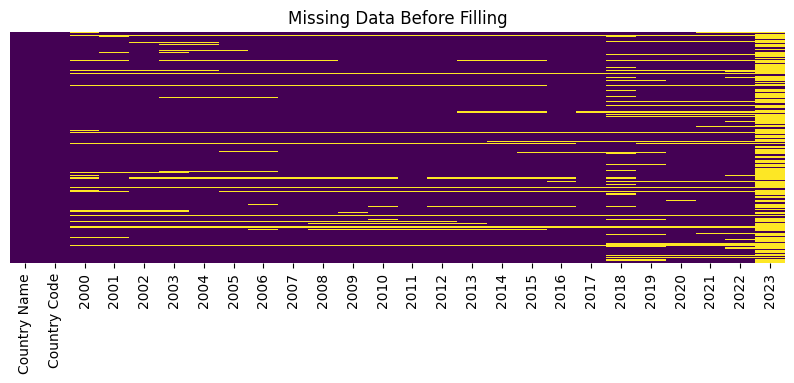

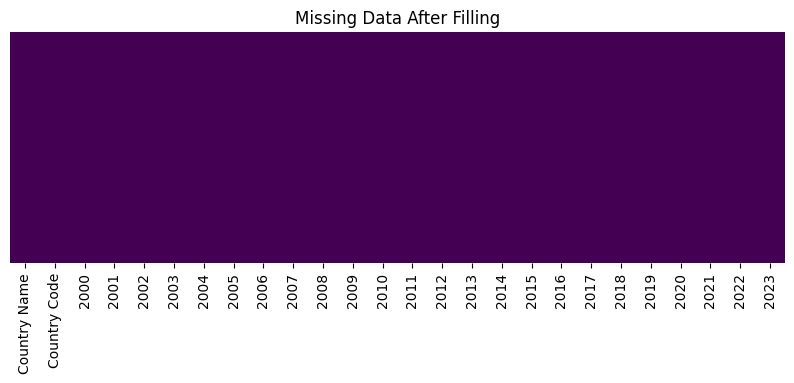

In [4]:
#Before and after filling: Visualization
plt.figure(figsize=(10,3))
sns.heatmap(original_data.isna(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Data Before Filling")
plt.show()

plt.figure(figsize=(10,3))
sns.heatmap(new_data.isna(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Data After Filling")
plt.show()

### Tidy Format
The dataset is in a wide format, where years are spread across columns. To make our visualization easier, let's convert it into a long format also known as `tidy format`.
- Makes it easier to plot trends over time (e.g., line charts).
- Easier to group and aggregate data by country & year.
- Works better with libraries like `Seaborn` and `Matplotlib`.


In [5]:
#### tidy
long_data = new_data.melt(id_vars=['Country Name', "Country Code"], var_name="Year", value_name="Internet Users")
long_data["Year"] = long_data["Year"].astype(int)
# long_data.duplicated().sum() check for duplication
long_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5208 entries, 0 to 5207
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    5208 non-null   object 
 1   Country Code    5208 non-null   object 
 2   Year            5208 non-null   int64  
 3   Internet Users  5208 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 162.9+ KB


### Visualization

In [6]:
# Global: average internet usage per year
global_trend = new_data[year_cols].mean()
global_trend.index = global_trend.index.astype(int)

# Create the figure
fig = go.Figure()

# interactive line plot
fig.add_trace(go.Scatter(
    x = year_cols,
    y = global_trend,
    mode = "lines+markers",
    line=dict(color="blue", width=2),
    # fill='tozeroy',
    marker = dict(size=6, symbol="circle", color="blue"),  # Corrected line
    name = "Global average Internet Usage",
    hovertemplate="<b>Year:</b> %{x}<br><b>Usage:</b> %{y:.2f}%<extra></extra>"
))

# Customize layout
fig.update_layout(
    title="Global Internet Usage Trend (2000–2023)",
    xaxis_title="Year",
    yaxis_title="Average Internet Usage (%)",
    template="plotly_white",
    font=dict(size=14),
    xaxis=dict(tickmode='linear', tickangle=45),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    hovermode='x unified',
    autosize=True,  # This enables dynamic resizing
)

fig.update_xaxes(type="linear")

# Show the figure
fig.show()